5350 Thesis in Economics

Andres Cruz 25199 & Klara Holmer 25037 

Code for Gymnasieskola - Högskoleförberedande Program

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import glob
import os
import matplotlib.pyplot as plt

Gymnasieskola I - Avgångselever, nationella program läsår 2014/15 till 2023/24 

"Uppgifterna avser betyg utfärdade under det valda läsåret."

- Spring semester year is used in the name of the ExcelFiles
- With LAG it becomes läsår 2012/13 till 2021/22

In [2]:
# Step 1 - Creating DataFrame_I

# --- Specify which program (i.e., which sheet_name) to read ---
program = "Högskoleförberedande program" 

# Printing program choice
print(f"Your choice was {program}")

Your choice was Högskoleförberedande program


In [3]:
# Step 1 - Creating DataFrame_I

# Define the folder path
path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Raw Data/gymnasieskola_I'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of LÄSÅR (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))

# Excel files are for the cohort finishing upper secondary school
# We are mainly interested in average scores from their first year at upper secondary school, therefore the DataSets need to be lagged by two years
# With the lag the year ranges from 2014/15 to 2021/22, which is manually done below
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Defining a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify which upper secondary program to read. This is done in the chunk above
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
        
        if i == 0:
            # For the first file, read without skipping rows to extract the header row (index 8), Pandas DataFrame positioning
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index 8
            column_names = temp_df.iloc[8].tolist()
            # Now read the data, skipping the first 9 rows from the excel file
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=9)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1)
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i] 

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'gymnasieskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# Applying the function, with specified program
DataFrame_I = read_excel_files(program)

In [4]:
# Step 2  - Changing column names and dropping columns that will not be used

# Define a list of new column names in the correct order
new_names = [
    'skola',                                        # Column 1: from 'Skola'
    'skol_enhetskod',                               # Column 2: from 'Skol-enhetskod'
    'skolkommun',                                   # Column 3: from 'Skolkommun'
    'kommun_kod',                                   # Column 4: from 'Kommun-kod'
    'typ_av_huvudman',                              # Column 5: from 'Typ av huvudman'
    'huvudman',                                     # Column 6: from 'Huvudman'
    'huvudman_orgnr',                               # Column 7: from 'Huvudman orgnr'
    'avgående_skolelever',                          # Column 8: from 'Totalt antal' 
    'andel_procent_med_examen',                     # Column 9: from 'Andel (%) med examen'
    'andel_procent_med_studiebevis',                # Column 10: from 'Andel (%) med studiebevis'
    'andel_procent_med_grundl_behörighet',          # Column 11: from 'Andel (%) med grundl. behörighet'
    'andel_procent_med_utökat_prog.',               # Column 12: from 'Andel (%) med utökat prog.'
    'GBP_för_elever_med_examen_eller_studiebevis',  # Column 13: from 'GBP för elever med examen eller studiebevis'
    'GBP_för_elever_med_examen',                    # Column 14: from 'GBP för elever med examen'
    'andel_elever_A_E_eng',                         # Column 15: from 'Eng 5'
    'andel_elever_A_E_historia',                    # Column 16: from 'Historia 1'
    'andel_elever_A_E_idrott',                      # Column 17: from 'Idrott 1'
    'andel_elever_A_E_ma',                          # Column 18: from 'Ma 1'
    'andel_elever_A_E_na',                          # Column 19: from 'Na 1'
    'andel_elever_A_E_re',                          # Column 20: from 'Re 1'
    'andel_elever_A_E_sam',                         # Column 21: from 'Sam 1'
    'andel_elever_A_E_sv',                          # Column 22: from 'Sv 1'
    'andel_elever_A_E_sv_andraspr',                 # Column 23: from 'Sv andraspr. 1'
    'andel_elever_A_E_gymnarb',                     # Column 24: from 'Gymnarb.'
    'läsår',                                        # Column 25: from 'läsår'
    'skolform'                                      # Column 26: from 'skolform'
    ]
    
# Assign the new column names based on their position
DataFrame_I.columns = new_names

# Define the list of columns to drop
columns_to_drop = [
    'skola', 'huvudman', 'huvudman_orgnr', 'andel_procent_med_examen', 'andel_procent_med_studiebevis', 
    'andel_procent_med_grundl_behörighet', 'andel_procent_med_utökat_prog.', 'GBP_för_elever_med_examen',
    'andel_elever_A_E_historia', 'andel_elever_A_E_idrott', 'andel_elever_A_E_na', 'andel_elever_A_E_re', 
    'andel_elever_A_E_sam', 'andel_elever_A_E_sv_andraspr', 'andel_elever_A_E_gymnarb'
    ]

# Drop the specified columns
DataFrame_I.drop(columns=columns_to_drop, axis=1, inplace=True)

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2880971604.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gpb_DataFrame_I.replace(['.', '..'], np.nan, inplace=True)
/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2880971604.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpb_DataFrame_I.replace(['.', '..'], np.nan, inplace=True)
/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2880971604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

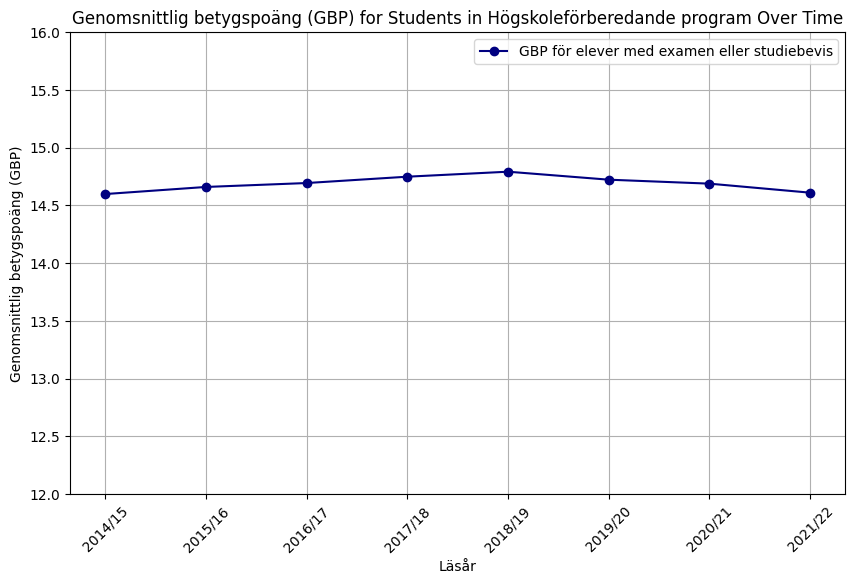

In [5]:
# Step 2 - A Side Analysis - Plot for Genomsnittlig Betygspoäng (GBP)

# Genomsnittlig Betygspoäng (GBP)
gpb_DataFrame_I = DataFrame_I[['skolform', 'läsår', 'GBP_för_elever_med_examen_eller_studiebevis']]

# Dropping GBP_för_elever_med_examen_eller_studiebevis from the main DataFrame
DataFrame_I.drop('GBP_för_elever_med_examen_eller_studiebevis', axis=1, inplace=True)

# Replacing . and .. with np.nan in the gpb_DataFrame
gpb_DataFrame_I.replace(['.', '..'], np.nan, inplace=True)

# Extract the last two digits (YY) for sorting
gpb_DataFrame_I['läsår_numeric'] = gpb_DataFrame_I['läsår'].str[-2:].astype(int)

# Group by 'läsår' and calculate the mean
df_plot = gpb_DataFrame_I.groupby(['läsår', 'läsår_numeric']).agg(
    {'GBP_för_elever_med_examen_eller_studiebevis': 'mean'}
).reset_index()

# Sort DataFrame by 'läsår_numeric' (ensures chronological order)
df_plot = df_plot.sort_values(by='läsår_numeric')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_plot['läsår'],  # Using 'läsår' (YYYY/YY) for x-axis labels
         df_plot['GBP_för_elever_med_examen_eller_studiebevis'], 
         marker='o', 
         label='GBP för elever med examen eller studiebevis',
         color='navy')

# Adjusting Y-axis 
plt.ylim(12, 16)

# Show all years on the X-axis and rotate for better readability
plt.xticks(df_plot['läsår'], rotation=45)

# Add titles and labels
plt.title(f'Genomsnittlig betygspoäng (GBP) for Students in {program} Over Time')
plt.xlabel('Läsår')
plt.ylabel('Genomsnittlig betygspoäng (GBP)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Deleting from global namespace
del df_plot

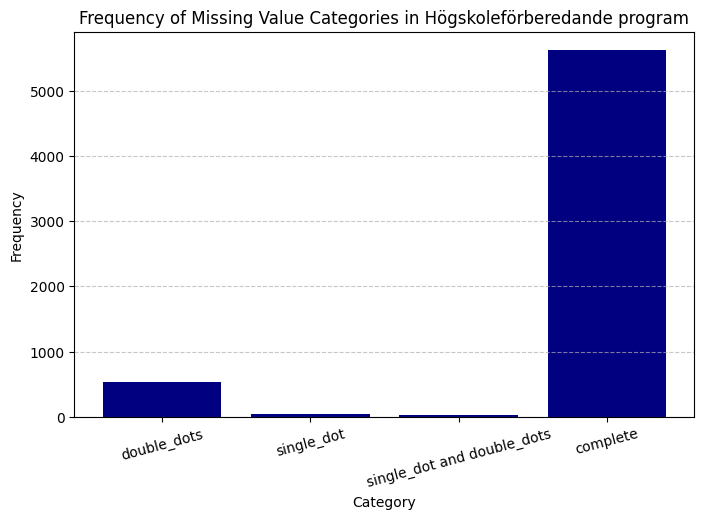

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/3502242980.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_DataFrame_I['läsår_numeric'] = filtered_DataFrame_I['läsår'].str[-2:].astype(int)


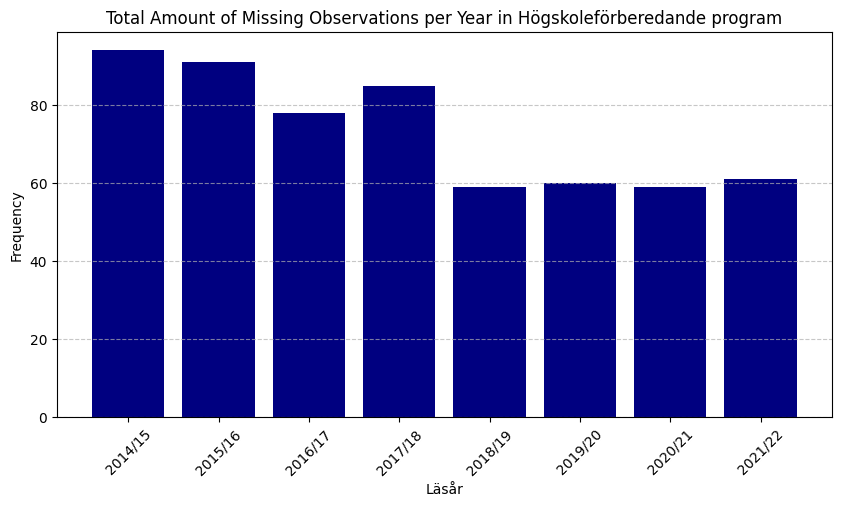

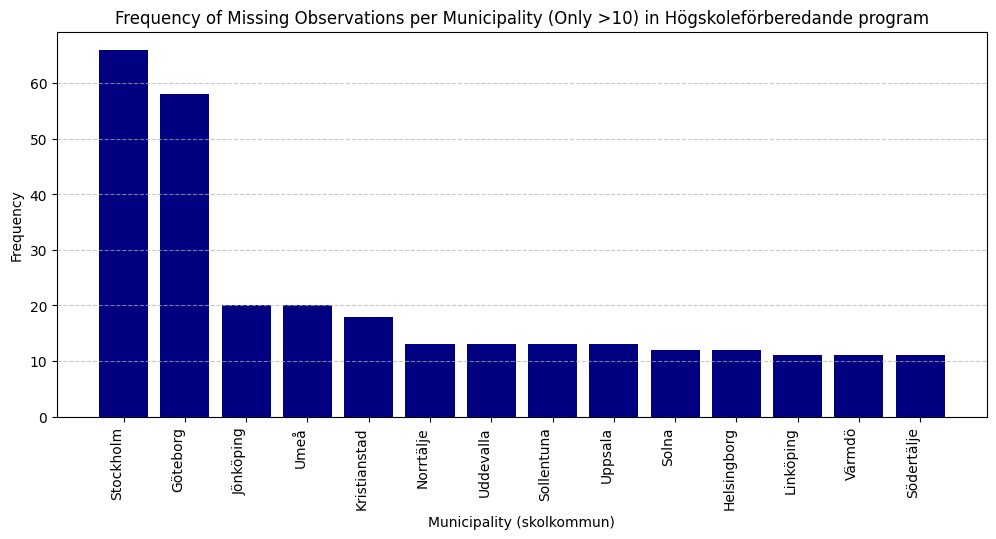

In [6]:
# Step 2 - A Side Analysis - Types of Missing Data

"""
Om resultatuppgiften baseras på färre än 10 elever, dubbelprickas den. 
Då visas två prickar (..)  istället för utfall. 
Om data saknas visas en prick (.) istället för utfall.
"""

# --- Plot 1: Frequency of Missing Value Categories ---

# Function to classify rows based on presence of '.' and '..'
def classify_missing_rows(row):
    contains_single_dot = (row == '.').any()
    contains_double_dot = (row == '..').any()

    if contains_single_dot and contains_double_dot:
        return "single_dot and double_dots"
    elif contains_double_dot:
        return "double_dots"
    elif contains_single_dot:
        return "single_dot"
    else:
        return "complete"

# Apply classification to both DataFrames
DataFrame_I["missing_data"] = DataFrame_I.apply(classify_missing_rows, axis=1)

# Define all possible category labels to ensure they appear
all_categories = ["double_dots", "single_dot", "single_dot and double_dots", "complete"]

# Count occurrences of each category and reindex to include all categories
category_counts = DataFrame_I['missing_data'].value_counts().reindex(all_categories, fill_value=0)

# Plot the frequency of each category
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='navy')

# Formatting
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Value Categories in {program}")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Dropping column created for plot 1
DataFrame_I.drop('missing_data', axis = 1, inplace=True)

# --- Plot 2: Total Amount of Missing Observations per Year ---

# Function to filter rows with '.' or '..'
def filter_missing_rows(df): 
    return df[df.isin(['.', '..']).any(axis=1)]

# Applying to filtered_DataFrame
filtered_DataFrame_I = filter_missing_rows(DataFrame_I) 

# Extract the starting year (YYYY) from "YYYY/YY" format
filtered_DataFrame_I['läsår_numeric'] = filtered_DataFrame_I['läsår'].str[-2:].astype(int)

# Get the full range of years from the available data
all_years = np.arange(filtered_DataFrame_I['läsår_numeric'].min(), 
                      filtered_DataFrame_I['läsår_numeric'].max() + 1).astype(str)

# Count occurrences of each year and reindex to include all years
year_counts = filtered_DataFrame_I['läsår'].value_counts().reindex(filtered_DataFrame_I['läsår'].unique(), fill_value=0)

# Plot the frequency of missing values per year
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='navy')

# Formatting
plt.xlabel("Läsår")
plt.ylabel("Frequency")
plt.title(f'Total Amount of Missing Observations per Year in {program}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# --- Plot 3: Frequency of Missing Observations per Municipality ---

# Count occurrences of each municipality
kommun_counts = filtered_DataFrame_I['skolkommun'].value_counts()

# Filter to keep only municipalities with frequency > 10
kommun_counts = kommun_counts[kommun_counts > 10]

# Plot the frequency of each municipality
plt.figure(figsize=(12, 5))
plt.bar(kommun_counts.index, kommun_counts.values, color='navy')

# Formatting
plt.xlabel("Municipality (skolkommun)")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Observations per Municipality (Only >10) in {program}")
plt.xticks(rotation=90, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# # Deleting from global namespace
del filtered_DataFrame_I

Hypothesis 1: All schools with only single_dots are missing not due to error, but simply because they data does not exist yet or should not exist. Hypothesis 2: All schools with single_dot and double_dots have missing values in all key variables of interest. Only Double Dots seems to be the bigger issue here

Missing not at random (MNAR)
Could be Missing at random (MAR), 
Could be Missing not at random (MNAR), schools who perform worse are systematically not reporting 

Since . indicates truly missing values, and because there were only a few, we decide to not impute those value
They should not heavily bias our results
We only mark them as np.nan, and drop them when neccesary 

However, there we quite a few .., so we are really worried that the dropping of those variables could bias our results 

Problem of structural censoring / censorship problem
Solution which yield robust inference?

One approach it to impute those values, but this approach is problematic since we are interested in casual inference 

Another approach is just to leave them out, but that could bias our results since those schools could systematically be different
However, we would think that those close (from above) to the .. threshold (i.e., schools with 10-20), 
should be very similar to those close from below to the threshold (i.e., 1-90)

Potential Solutions
Imputing
    Multiple Imputation (PMM)
    Simple Mean/Median Impution
Filling in as NA and leaving as is
Dropping NA all together  
Tobit Regression

 I also want to use the school_year_size as a grouping in this imputing 
The idea would be to impute based on as close observation as possiblle
The schoold wiht only double_dots have systematic low amount of students 
Thus imputing based on skolkommun, läsår_vår, typ_av_huvudman 

But the correlation observed in these variables could translate over to the outcomes
And either make the correlation stronger or weakes (what direction is unkown
perhaps look at a simple correlation mateix 

In [7]:
# Step 4 - Modifying the Dataframe based on the above analysis

# Replacing . with np.nan for now 
DataFrame_I.replace(['.', '..'], np.nan, inplace=True)

# # Function to fill missing values using the mean within each group
# def impute_antal_elever(df, method="mean"):
#     if method == "mean":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.mean()))
#     elif method == "median":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.median()))
#     else:
#         raise ValueError("Invalid method. Choose 'mean', 'median', 'ffill', or 'bfill'.")
#     return df

# # Apply the imputation function with the desired method (mean, median, ffill, bfill)
# filtered_nationella_program = impute_antal_elever(filtered_nationella_program, method="mean")

print(DataFrame_I)

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/778582967.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataFrame_I.replace(['.', '..'], np.nan, inplace=True)


      skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman  \
0           74776778    Alingsås        1489        Kommunal   
1           18345915    Alingsås        1489        Kommunal   
2           68229719    Alingsås        1489        Kommunal   
3           61004230    Alingsås        1489        Kommunal   
4           71262305      Arboga        1984        Kommunal   
...              ...         ...         ...             ...   
6201        47559319   Östersund        2380         Enskild   
6202        20752831   Österåker         117        Kommunal   
6203        51023367   Östhammar         382        Kommunal   
6204        34739511   Östhammar         382         Enskild   
6205        52690153  Övertorneå        2518        Kommunal   

      avgående_skolelever  andel_elever_A_E_eng  andel_elever_A_E_ma  \
0                    44.0                  97.7                100.0   
1                    41.0                 100.0                100.0   
2              

In [8]:
# Step 5 - Creating Andel F column and some final modifications

# Mapping of old column names to new column names
columns_mapping = {
    'andel_elever_A_E_eng': 'andel_elever_F_eng',
    'andel_elever_A_E_ma':  'andel_elever_F_ma',
    'andel_elever_A_E_sv':  'andel_elever_F_sv'
}

# Apply the transformation using a loop
for andel_elever_A_E, andel_elever_F in columns_mapping.items():

    # Total Percent
    PERCENT = 100

    # Creating variable andel_elever_f 
    DataFrame_I[andel_elever_F] = (PERCENT - DataFrame_I[andel_elever_A_E]).round(1)

# Define the desired column order
column_order = [
    'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform', 'avgående_skolelever', 
    'andel_elever_A_E_eng', 'andel_elever_A_E_ma', 'andel_elever_A_E_sv',  
    'andel_elever_F_eng', 'andel_elever_F_ma', 'andel_elever_F_sv']

# Reorder the DataFrame
DataFrame_I = DataFrame_I[column_order]

Gymnasieskola - Antal elever 2013/14 till 2021/22

"Uppgifterna avser oktober det valda året."

- Autumn semester year is used in the name of the ExcelFiles
- Manually changing the year in the names of the ExcelFiles to correspond to the spring semester year
- Assumption 'Antal Elever' is the same for the autumn and spring semester


In [9]:
# Step 1 - Creating Dataframe_II

path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Raw Data/gymnasieskola_II'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of LÄSÅR (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Creating a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify (at the end of this chunk) which sheet_name to read 
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
        
        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index in Pandas DataFrame positioning
            column_names = temp_df.iloc[10].tolist()
            # Now read the data, skipping the first rows 11 (10+1 for excel file indexing) from the Excel File, 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=11)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1) # adding 1 since Excel start from index/row 1
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i]

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'gymnasieskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# Applying the function to the program (i.e., sheet_name specified in the beginning of the code)
DataFrame_II = read_excel_files(program)

In [10]:
# Step 2  - Changing column names and dropping columns that will not be used

# Define a list of new column names in the correct order
new_column_names = [
    'skola',                            # Column 1 'Skola'
    'skol_enhetskod',                   # Column 2 'Skol-enhetskod'
    'skolkommun',                       # Column 3 'Skolkommun'
    'kommun_kod',                       # Column 4 'Kommun-kod'
    'typ_av_huvudman',                  # Column 5 'Typ av huvudman'
    'huvudman',                         # Column 6 'Huvudman'
    'huvudman_orgnr',                   # Column 7 'Huvudman orgnr'
    'antal_skolelever',                 # Column 8 'Antal elever' 
    'antal_elever_skolår_1',            # Column 9 'Antal elever skolår 1'
    'antal_elever_skolår_2',            # Column 10 'Antal elever skolår '2'
    'antal_elever_skolår_3',            # Column 11 'Antal elever skolår 3
    'andel_tjejer',                     # Column 12 'Andel kvinnor (%)'
    'andel_m_utl_bakgr',                # Column 13 'Andel m utl bakgr (%)'
    'andel_m_högutb_föräldrar',         # Column 14 'Andel m högutb föräldrar (%)'
    'läsår',                            # Column 15 'läsår_vår'
    'skolform'                          # Column 16  'skolform'
    ]

# Define a list of columns to drop
columns_to_drop = [
    'skola', 
    'huvudman',                         # Column 6 'Huvudman'
    'huvudman_orgnr',                   # Column 7 'Huvudman orgnr'
    'antal_elever_skolår_1',            # Column 9 'Antal elever skolår 1'
    'antal_elever_skolår_2',            # Column 10 'Antal elever skolår '2'
    'antal_elever_skolår_3'             # Column 11 'Antal elever skolår 3
    ]


# Assigning new column names
DataFrame_II.columns = new_column_names 

# Dropping columns which will not be use
DataFrame_II.drop(columns=columns_to_drop, axis=1, inplace=True)

# Creating school_size_category
bins = [1, 49, 99, 199, 299, 399, 499, 599, 699, 799, 899, np.inf]
labels = ["1-49", "50-99", "100-199", "200-299", "300-399", "400-499", "500-599", "600-699", "700-799", "800-899", "900+"]

# Create a new column with categorized school sizes
DataFrame_II['school_size'] = pd.cut(DataFrame_II['antal_skolelever'], bins=bins, labels=labels, right=True)

print(DataFrame_II)

      skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman  \
0           74776778    Alingsås        1489        Kommunal   
1           18345915    Alingsås        1489        Kommunal   
2           68229719    Alingsås        1489        Kommunal   
3           61004230    Alingsås        1489        Kommunal   
4           71262305      Arboga        1984        Kommunal   
...              ...         ...         ...             ...   
6725        47559319   Östersund        2380         Enskild   
6726        20752831   Österåker         117        Kommunal   
6727        51023367   Östhammar         382        Kommunal   
6728        34739511   Östhammar         382         Enskild   
6729        52690153  Övertorneå        2518        Kommunal   

      antal_skolelever andel_tjejer andel_m_utl_bakgr  \
0                  135           43                19   
1                  211           30                16   
2                  155           63                14   
3  

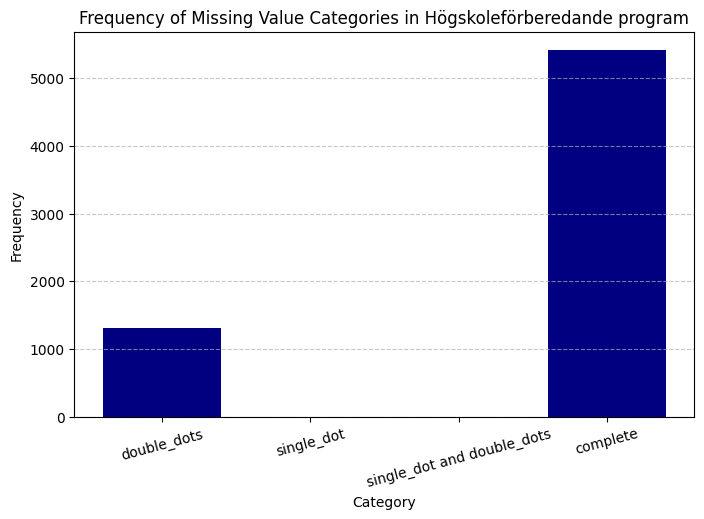

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2949103742.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_DataFrame_II['läsår_numeric'] = filtered_DataFrame_II['läsår'].str[-2:].astype(int)


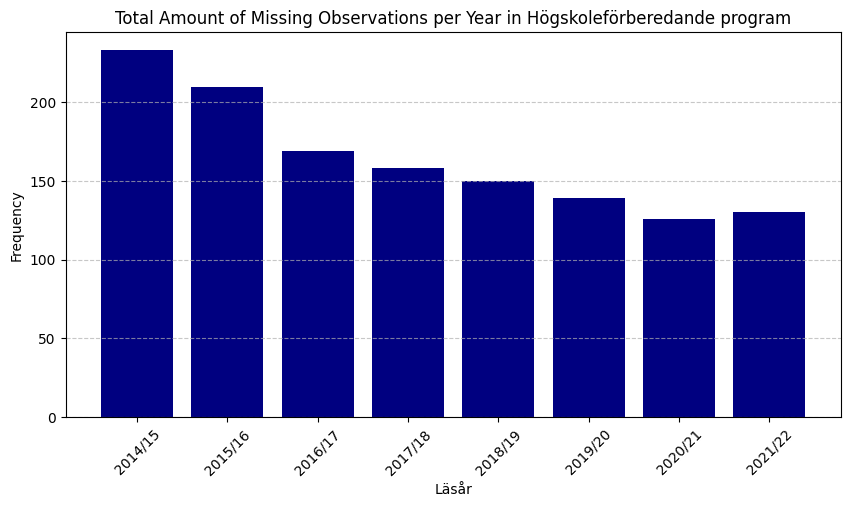

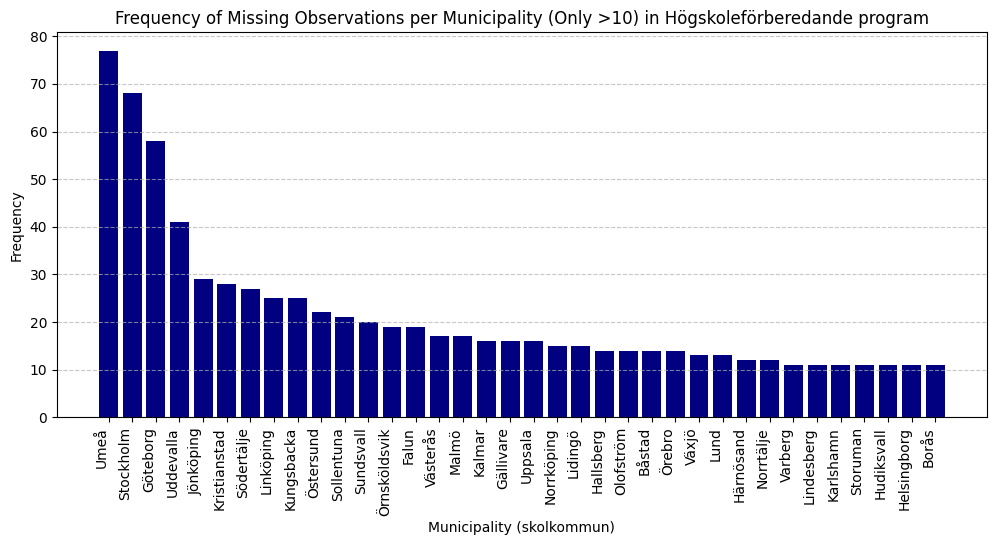

In [11]:
# Step 3 - Analyzing Types of Missing Data

"""
Observera att uppgifter avseende kön, utländsk bakgrund samt föräldrarnas utbildningsnivå dubbelprickas om de baseras på färre än 10 elever.
Då visas två prickar (..) istället för utfall. Om data saknas visas en prick (.)  istället för utfall.
"""

# --- Plot 1: Frequency of Missing Value Categories ---

# Function to classify rows based on presence of '.' and '..'
def classify_missing_rows(row):
    contains_single_dot = (row == '.').any()
    contains_double_dot = (row == '..').any()

    if contains_single_dot and contains_double_dot:
        return "single_dot and double_dots"
    elif contains_double_dot:
        return "double_dots"
    elif contains_single_dot:
        return "single_dot"
    else:
        return "complete"

# Apply classification to both DataFrames
DataFrame_II["missing_data"] = DataFrame_II.apply(classify_missing_rows, axis=1)

# Define all possible category labels to ensure they appear
all_categories = ["double_dots", "single_dot", "single_dot and double_dots", "complete"]

# Count occurrences of each category and reindex to include all categories
category_counts = DataFrame_II['missing_data'].value_counts().reindex(all_categories, fill_value=0)

# Plot the frequency of each category
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='navy')

# Formatting
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Value Categories in {program}")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Dropping column created for plot 1
DataFrame_II.drop('missing_data', axis = 1, inplace=True)

# --- Plot 2: Total Amount of Missing Observations per Year ---

# Function to filter rows with '.' or '..'
def filter_missing_rows(df): 
    return df[df.isin(['.', '..']).any(axis=1)]

# Applying to filtered_DataFrame
filtered_DataFrame_II = filter_missing_rows(DataFrame_II) 

# Extract the starting year (YYYY) from "YYYY/YY" format
filtered_DataFrame_II['läsår_numeric'] = filtered_DataFrame_II['läsår'].str[-2:].astype(int)

# Get the full range of years from the available data
all_years = np.arange(filtered_DataFrame_II['läsår_numeric'].min(), 
                      filtered_DataFrame_II['läsår_numeric'].max() + 1).astype(str)

# Count occurrences of each year and reindex to include all years
year_counts = filtered_DataFrame_II['läsår'].value_counts().reindex(filtered_DataFrame_II['läsår'].unique(), fill_value=0)

# Plot the frequency of missing values per year
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='navy')

# Formatting
plt.xlabel("Läsår")
plt.ylabel("Frequency")
plt.title(f'Total Amount of Missing Observations per Year in {program}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# --- Plot 3: Frequency of Missing Observations per Municipality ---

# Count occurrences of each municipality
kommun_counts = filtered_DataFrame_II['skolkommun'].value_counts()

# Filter to keep only municipalities with frequency > 10
kommun_counts = kommun_counts[kommun_counts > 10]

# Plot the frequency of each municipality
plt.figure(figsize=(12, 5))
plt.bar(kommun_counts.index, kommun_counts.values, color='navy')

# Formatting
plt.xlabel("Municipality (skolkommun)")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Observations per Municipality (Only >10) in {program}")
plt.xticks(rotation=90, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Deleting from global namespace
del filtered_DataFrame_II

Analysis here 

In [12]:
# Step 4 - Modifying Dataframe_II based on the above analysis

# Replacing . with np.nan for now 
DataFrame_II.replace(['.', '..'], np.nan, inplace=True)

# # Function to fill missing values using the mean within each group
# def impute_antal_elever(df, method="mean"):
#     if method == "mean":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.mean()))
#     elif method == "median":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.median()))
#     else:
#         raise ValueError("Invalid method. Choose 'mean', 'median', 'ffill', or 'bfill'.")
#     return df

# # Apply the imputation function with the desired method (mean, median, ffill, bfill)
# filtered_nationella_program = impute_antal_elever(filtered_nationella_program, method="mean")


/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2568269704.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataFrame_II.replace(['.', '..'], np.nan, inplace=True)


In [13]:
# Step 5 -  Final Modification to the Dataframe_II

# Define the desired column order
column_order = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
                'antal_skolelever',  'school_size',
                'andel_tjejer', 'andel_m_utl_bakgr', 'andel_m_högutb_föräldrar']

# Reorder the DataFrame
DataFrame_II = DataFrame_II[column_order]

print(DataFrame_II)

      skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0           74776778    Alingsås        1489        Kommunal  2014/15   
1           18345915    Alingsås        1489        Kommunal  2014/15   
2           68229719    Alingsås        1489        Kommunal  2014/15   
3           61004230    Alingsås        1489        Kommunal  2014/15   
4           71262305      Arboga        1984        Kommunal  2014/15   
...              ...         ...         ...             ...      ...   
6725        47559319   Östersund        2380         Enskild  2021/22   
6726        20752831   Österåker         117        Kommunal  2021/22   
6727        51023367   Östhammar         382        Kommunal  2021/22   
6728        34739511   Östhammar         382         Enskild  2021/22   
6729        52690153  Övertorneå        2518        Kommunal  2021/22   

           skolform  antal_skolelever school_size  andel_tjejer  \
0     gymnasieskola               135     100-199       

Gymnasieskola - Personalstatistik med lärarlegitimation och behörighet 2014/15 till 2021/22 

"Statistiken avser anställda den 15 oktober valt läsår."

- Autumn semester year is used in the name of the ExcelFiles
- Manually changing the year in the names of the ExcelFiles to correspond to the spring semester year
- Assumption 'Personalstatistik med lärarlegitimation och behörighet' is the same for the autumn and spring semester

In [14]:
# Step 1 - Creating Dataframe_III

path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Raw Data/gymnasieskola_III'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of years (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Defining a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify which sheet name from the Excel file to read
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
            
        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index 9, Pandas DataFrame positioning
            column_names = temp_df.iloc[9].tolist()
            # Now read the data, skipping the first 10 rows from the Excel File
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=10)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1) # adding 1 since Excel start from index/row 1
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i]

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'gymnasieskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# Applying the function, with specified sheet name
DataFrame_III = read_excel_files("Samtliga lärare" )

In [15]:
# Step 2  - Renaming, dropping , and reordering columns

# Define a list of new column names in the correct order
new_column_names = [
    'skola',                                                  # Column 1 'Skola'
    'skol_enhetskod',                                         # Column 2 'Skol-enhetskod'
    'skolkommun',                                             # Column 3 'Skolkommun'
    'kommun_kod',                                             # Column 4 'Kommun-kod'
    'typ_av_huvudman',                                        # Column 5 'Typ av huvudman'
    'huvudman',                                               # Column 6 'Huvudman'
    'huvudman_orgnr',                                         # Column 7 'Huvudman orgnr'
    'heltid_antal_lärare',                                    # Column 8 'Heltidstjänster Totalt antal'
    'heltid_antal_lärare_legitimation_behörighet',            # Column 9 'Heltidstjänster Antal med lärarlegitimation och behörighet'
    'heltid_andel_lärare_legitimation_behörighet',            # Column 10 'Heltidstjänster Andel med lärarlegitimation och behörighet'
    'heltid_förstelärare',                                    # Column 11 'Heltidstjänster Förstelärare'
    'tjänst_antal_lärare',                                    # Column 12 'Tjänstgörande lärare Totalt antal '
    'tjänst_antal_lärare_legitimation_behörighet',            # Column 13 'Tjänstgörande lärare Antal med lärarlegitimation och behörighet i minst ett ämne'
    'tjänst_andel_lärare_legitimation_behörighet',            # Column 14 'Tjänstgörande lärare Andel med lärarlegitimation och behörighet i minst ett ämne'
    'tjänst_förstelärare',                                    # Column 15 'Tjänstgörande lärare Förstelärare '
    'läsår',                                                  # Column 16 'läsår'
    'skolform'                                                # Column 17 'skolform'
    ]

# Define a list of columns to drop
columns_to_drop = [
    'skola',    
    'huvudman',                                               
    'huvudman_orgnr',                                         
    'heltid_förstelärare',  
    'tjänst_förstelärare', 
    ]

# Define the desired column order
column_order = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
                'heltid_antal_lärare', 'heltid_antal_lärare_legitimation_behörighet', 'heltid_andel_lärare_legitimation_behörighet',            
                'tjänst_antal_lärare', 'tjänst_antal_lärare_legitimation_behörighet', 'tjänst_andel_lärare_legitimation_behörighet']          

# Assigning new column names
DataFrame_III.columns = new_column_names 

# Dropping columns which will not be used
DataFrame_III.drop(columns=columns_to_drop, axis=1, inplace=True)

# Reorder the DataFrame
DataFrame_III = DataFrame_III[column_order]

print(DataFrame_III)

      skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0           93221031         Ale        1440         Enskild  2014/15   
1           17474377    Alingsås        1489         Enskild  2014/15   
2           74776778    Alingsås        1489        Kommunal  2014/15   
3           18345915    Alingsås        1489        Kommunal  2014/15   
4           68229719    Alingsås        1489        Kommunal  2014/15   
...              ...         ...         ...             ...      ...   
9584        20752831   Österåker         117        Kommunal  2021/22   
9585        51023367   Östhammar         382        Kommunal  2021/22   
9586        34739511   Östhammar         382         Enskild  2021/22   
9587        95069937   Östhammar         382         Enskild  2021/22   
9588        52690153  Övertorneå        2518        Kommunal  2021/22   

           skolform  heltid_antal_lärare  \
0     gymnasieskola                  2.6   
1     gymnasieskola                

Gymnasieskola - Kombinerar DataFrames

Gymnasieskola I - Avgångselever, nationella program läsår 2014/15 till 2021/22
- Defined as DataFrame_I

Gymnasieskola - Antal elever 2014/15 till 2021/22
- Defined as DataFrame_II

Gymnasieskola - Personalstatistik med lärarlegitimation och behörighet 2014/15 till 2021/22 
- Defined as DataFrame_III


In [16]:
# Code to remember what sheets you have chosen

print(f"Remember your sheet choices were: \n"
      f"For DataFrame_I and DataFrame_II: {program}")

print(DataFrame_III)

Remember your sheet choices were: 
For DataFrame_I and DataFrame_II: Högskoleförberedande program
      skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0           93221031         Ale        1440         Enskild  2014/15   
1           17474377    Alingsås        1489         Enskild  2014/15   
2           74776778    Alingsås        1489        Kommunal  2014/15   
3           18345915    Alingsås        1489        Kommunal  2014/15   
4           68229719    Alingsås        1489        Kommunal  2014/15   
...              ...         ...         ...             ...      ...   
9584        20752831   Österåker         117        Kommunal  2021/22   
9585        51023367   Östhammar         382        Kommunal  2021/22   
9586        34739511   Östhammar         382         Enskild  2021/22   
9587        95069937   Östhammar         382         Enskild  2021/22   
9588        52690153  Övertorneå        2518        Kommunal  2021/22   

           skolform  helt

In [17]:
# --- Step 1 Merging DataFrames ---

# https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/
# Using LEFT JOIN
# Gymnasieskola_I <- Gymnasieskola_II  
# Gymnasieskola_I <- Gymnasieskola_III

# Define the join keys (columns that will NOT receive suffixes)
join_keys = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform']

# Merge the first two DataFrames with an left join and custom suffixes:
DataFrame = pd.merge(
    DataFrame_I,
    DataFrame_II, 
    on = join_keys,
    how = 'left')

# Merge the first two DataFrames with an inner join and custom suffixes:
DataFrame = pd.merge(
    DataFrame,
    DataFrame_III, 
    on = join_keys,
    how = 'left')

# --- Step 2 Preparing for exporting DataFrames ---

# Define common columns to keep in all subsets
common_columns = [
    'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
    'school_size', 'antal_skolelever', 'avgående_skolelever', 
    'andel_tjejer', 'andel_m_utl_bakgr', 'andel_m_högutb_föräldrar', 
    'heltid_antal_lärare', 'heltid_antal_lärare_legitimation_behörighet', 'heltid_andel_lärare_legitimation_behörighet', 
    'tjänst_antal_lärare', 'tjänst_antal_lärare_legitimation_behörighet', 'tjänst_andel_lärare_legitimation_behörighet'
]

# Define specific columns for each subject
engelska_columns = common_columns + ['andel_elever_A_E_eng', 'andel_elever_F_eng']
matematik_columns = common_columns + ['andel_elever_A_E_ma', 'andel_elever_F_ma']
svenska_columns = common_columns + ['andel_elever_A_E_sv', 'andel_elever_F_sv']

# Create separate DataFrames
gymnasieskola_engelska = DataFrame[engelska_columns]
gymnasieskola_matematik = DataFrame[matematik_columns]
gymnasieskola_svenska = DataFrame[svenska_columns]

# --- Step 3 Exporting --- 

# Defining the full path where the Excel file will be saved
path = '/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Processed Data/gymnasieskola.xlsx'

# Exporting all the tables created into one Excel File
with pd.ExcelWriter(path) as writer:
    gymnasieskola_engelska.to_excel(writer, sheet_name='Engelska', index=False)
    gymnasieskola_matematik.to_excel(writer, sheet_name='Matematik', index=False)
    gymnasieskola_svenska.to_excel(writer, sheet_name='Svenska', index=False)

Grundskola - Slutbetyg årskurs 9, samtliga elever läsår 2014/15 till 2023/24 

"Samtliga uppgifter utom totalen för antal elever, avser elever med betyg enligt det mål- och kunskapsrelaterade betygssystemet. Uppgifterna avser betyg före prövning."

- Spring semester year is used in the name of the ExcelFiles

In [18]:
# Step 1 - Slutbetyg årskurs 9 Grundskola - Creating Dataframe 

path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/Raw Data/grundskola_IIII'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of LÄSÅR (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Creating a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify (at the end of this chunk) which sheet_name to read 
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
        
        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index in Pandas DataFrame positioning
            column_names = temp_df.iloc[6].tolist()
            # Now read the data, skipping the first rows 7 (6+1 for excel file indexing) from the Excel File, 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=7)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1) # adding 1 since Excel start from index/row 1
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i]

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'grundskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)


# --- Specify sheet name choice ---
sheet_name_choice = "Statistik"

# Applying the function 
gpb_DataFrame_IIII = read_excel_files(sheet_name_choice)

In [19]:
# Step 2 - Modifying gpb_DataFrame_IIII

# Define a list of new column names in the correct order
new_names = [
    'skola',                                        # Column 1: from 'Skola'
    'skol_enhetskod',                               # Column 2: from 'Skol-enhetskod'
    'skolkommun',                                   # Column 3: from 'Skolkommun'
    'kommun_kod',                                   # Column 4: from 'Kommun-kod'
    'typ_av_huvudman',                              # Column 5: from 'Typ av huvudman'
    'huvudman',                                     # Column 6: from 'Huvudman'
    'huvudman_orgnr',                               # Column 7: from 'Huvudman orgnr'
    'antal_elever',                                 # Column 8: from 'Antal elever' 
    'andel_uppnått_kunskapskraven_i_alla_ämnen',    # Column 9: Andel som uppnått kunskapskraven i alla ämnen
    'andel_%_elever_behöriga_yrkesprog.',           # Column 10: Andel (%) elever behöriga till yrkesprog.
    'genomsnittligt_meritvärde',                    # Column 11: Genomsnittligt meritvärde (17 ämnen)
    'läsår',                                        # Column 12: from 'läsår'
    'skolform'                                      # Column 13: from 'skolform'
    ]
    
# Assign the new column names based on their position
gpb_DataFrame_IIII.columns = new_names

# Keeping only relevant columns
gpb_DataFrame_IIII = gpb_DataFrame_IIII[['skolform', 'läsår', 'genomsnittligt_meritvärde']]

# Filling in . and .. as np.nan (i.e., missing values)
gpb_DataFrame_IIII.replace(['.', '..'], np.nan, inplace=True)

# Genomsnittligt meritvärde (17 ämnen)
# Approximation to Gymnasieskolans Genomsnittligt Betygspoäng by divding by 17
antal_ämnen = 17 
gpb_DataFrame_IIII['genomsnittligt_meritvärde'] = (gpb_DataFrame_IIII['genomsnittligt_meritvärde'] / antal_ämnen).round(1)

# Extract the last two digits (YY) for sorting
gpb_DataFrame_IIII['läsår_numeric'] = gpb_DataFrame_IIII['läsår'].str[-2:].astype(int)

gpb_DataFrame_I

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_14015/2404142351.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gpb_DataFrame_IIII.replace(['.', '..'], np.nan, inplace=True)


,skolform,läsår,GBP_för_elever_med_examen_eller_studiebevis,läsår_numeric
0,gymnasieskola,2014/15,14.7,15
1,gymnasieskola,2014/15,15.2,15
2,gymnasieskola,2014/15,14.8,15
3,gymnasieskola,2014/15,16.5,15
4,gymnasieskola,2014/15,15.5,15
...,...,...,...,...
6201,gymnasieskola,2021/22,12.8,22
6202,gymnasieskola,2021/22,13.5,22
6203,gymnasieskola,2021/22,14.6,22
6204,gymnasieskola,2021/22,14.5,22


In [20]:
# Step 3 - Modifying gpb_DataFrame_IIII and gpb_DataFrame_I

# Define a list of new column names in the correct order
new_names = ['skolform', 'läsår', 'Betygspoäng', 'läsår_numeric']

# Changing names 
gpb_DataFrame_IIII.columns = new_names # New plot data created - Grundskola
gpb_DataFrame_I.columns = new_names  # Old plot data created - Gymnasieskola

# Concatinating DataFrames
gpb_did_plot = pd.concat([gpb_DataFrame_I, gpb_DataFrame_IIII], ignore_index=True)

gpb_did_plot

,skolform,läsår,Betygspoäng,läsår_numeric
0,gymnasieskola,2014/15,14.7,15
1,gymnasieskola,2014/15,15.2,15
2,gymnasieskola,2014/15,14.8,15
3,gymnasieskola,2014/15,16.5,15
4,gymnasieskola,2014/15,15.5,15
...,...,...,...,...
19592,grundskola,2021/22,11.4,22
19593,grundskola,2021/22,NaN,22
19594,grundskola,2021/22,15.2,22
19595,grundskola,2021/22,13.5,22


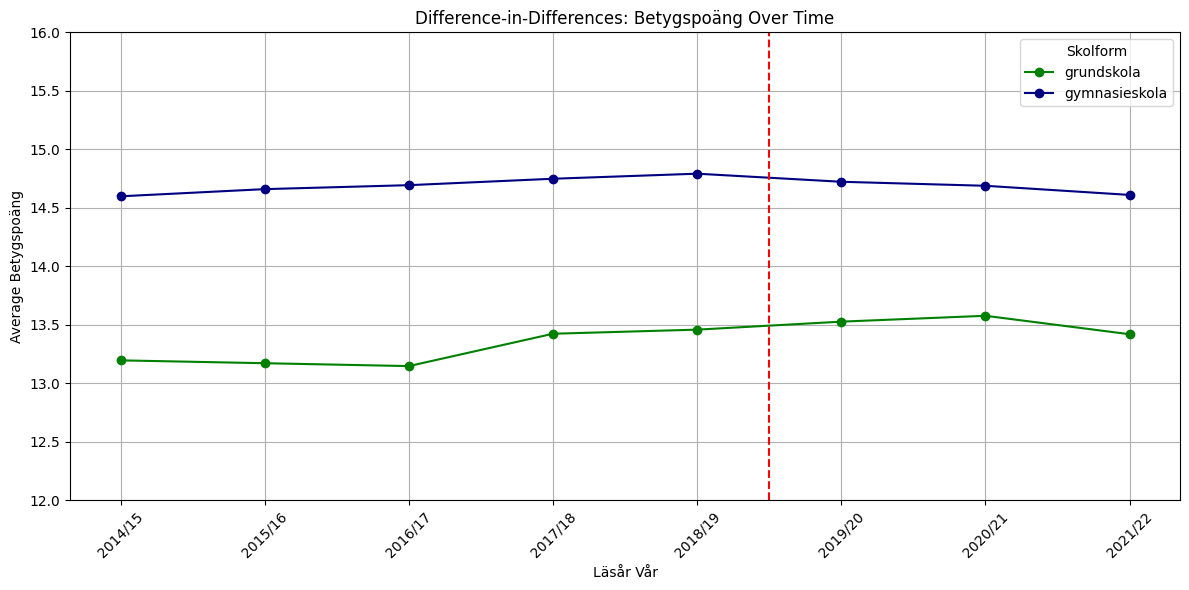

In [21]:
# Step 4 - A Side Analysis - Plot for Genomsnittlig Betygspoäng (GBP) Continuation

import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot_gbp(data, title, ylim=(12, 16), treatment_year=19.5):
    """
    Processes the dataset for the Genomsnittlig Betygspoäng (GBP) plot and generates a plot over time.
    
    Parameters:
    - data: Pandas DataFrame containing the data. It must include a 'läsår' column in the format 'yyyy/yy'.
    - title: Title for the plot.
    - ylim: Tuple to set y-axis limits (default is (12, 16)).
    - treatment_year: Optional numeric treatment year (yy) to mark with a vertical line.
    """
    # Extract the numeric part (yy) from 'läsår'
    data['year_numeric'] = data['läsår'].apply(lambda x: int(x.split('/')[1]))
    
    # Aggregate data by year_numeric, läsår, and school type (skolform)
    grouped_df = data.groupby(['year_numeric', 'läsår', 'skolform'], as_index=False)['Betygspoäng'].mean()
    
    # Create a full range of numeric years for continuity in the plot
    all_years = pd.DataFrame({
        'year_numeric': range(grouped_df['year_numeric'].min(), grouped_df['year_numeric'].max() + 1)
    })
    
    # Create a mapping from numeric year to läsår using available data
    mapping = dict(zip(grouped_df['year_numeric'], grouped_df['läsår']))
    
    # Generate the plot
    plt.figure(figsize=(12, 6))
    
    for skolform, subset in grouped_df.groupby('skolform'):
        # Merge with all_years to ensure continuity
        subset = all_years.merge(subset, on='year_numeric', how='left')
        subset['skolform'] = skolform  # Ensure skolform is preserved
        
        # Set color based on skolform: gymnasieskola -> blue, grundskola -> green
        if skolform.lower() == 'gymnasieskola':
            color = 'navy'
        elif skolform.lower() == 'grundskola':
            color = 'green'
        else:
            color = None  # default color if other skolform values exist
        
        # Plot the trend for this school type using numeric year for the x-axis
        plt.plot(subset['year_numeric'], subset['Betygspoäng'], marker='o', linestyle='-', label=skolform, color=color)
    
    # Optionally add a vertical line for the treatment year, if provided
    if treatment_year is not None:
        plt.axvline(x=treatment_year, color='red', linestyle='--')
    
    # Configure x-ticks: display the numeric years with the original läsår labels
    xticks = all_years['year_numeric']
    xlabels = [mapping.get(x, f"{2000 + x - 1}/{x:02d}") for x in xticks]
    plt.xticks(xticks, xlabels, rotation=45)
    
    # Set the y-axis limits
    plt.ylim(ylim)
    
    # Configure the rest of the plot
    plt.title(title)
    plt.xlabel('Läsår Vår')
    plt.ylabel('Average Betygspoäng')
    plt.legend(title='Skolform')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Apply the function to the gpb_did_plot dataframe
process_and_plot_gbp(gpb_did_plot, 'Difference-in-Differences: Betygspoäng Over Time')